In [1]:
# Modules
using Pkg
import Cairo, Fontconfig
using Compose
using Graphs
    Graph = Graphs.Graph
using GraphPlot
using InvertedIndices
    Not = InvertedIndices.Not # conflicts with SymPy "Not()"
using Latexify
using LinearAlgebra
using Plots
using Printf
using Revise
using Symbolics
    simplify = Symbolics.simplify # conflicts with something
using SymPy

# My Modules#
includet("graphs.jl")
includet("helper.jl")
includet("matrix.jl")
includet("simulation.jl")

┌ Info: Saved animation to /Users/giancarloarcese/Desktop/programming/julia/cops_and_robbers/media/simulation.gif
└ @ Plots /Users/giancarloarcese/.julia/packages/Plots/bMtsB/src/animation.jl:156


Plots.AnimatedGif("/Users/giancarloarcese/Desktop/programming/julia/cops_and_robbers/media/simulation.gif")
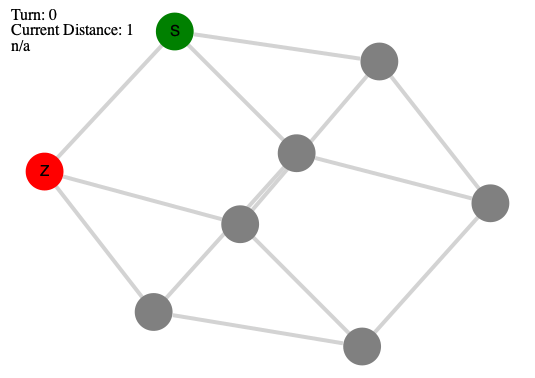

In [2]:
simulation(hyper3, 1, 2, animate = true)

In [3]:
gen_matrix(3)

3×3 Matrix{Num}:
      F[1] + c[1] + f[1]               -f[1]            -F[1]
 -c[2]                    C[2] + c[2] + f[2]            -f[2]
 -C[3]                             -c[3]      C[3] + c[3]

In [12]:
for i in 1:5
    for j in gen_det(i, symbolic = true, Xs = true) |> PyObject |> 
    x -> sympy.collect(x, ["S_1ˏ_1", "S_2ˏ_1", "S_3ˏ_1", "S_4ˏ_1", "S_5ˏ_1", "S_6ˏ_1"]) |> 
    x -> x.args
    
    display(j)
    end
    display("------")
end

"------"

S_2ˏ_1

S_1ˏ_1⋅X₂

"------"

S_3ˏ_1

S_1ˏ_1⋅(S_2ˏ_2 + X₂⋅X₃)

S_2ˏ_1⋅X₃

"------"

S_4ˏ_1

S_1ˏ_1⋅(S_2ˏ_2⋅X₄ + S_2ˏ_3⋅X₂ + S_3ˏ_2 + X₂⋅X₃⋅X₄)

S_2ˏ_1⋅(S_2ˏ_3 + X₃⋅X₄)

S_3ˏ_1⋅X₄

"------"

S_5ˏ_1

S_1ˏ_1⋅(S_2ˏ_2⋅S_2ˏ_4 + S_2ˏ_2⋅X₄⋅X₅ + S_2ˏ_3⋅X₂⋅X₅ + S_2ˏ_4⋅X₂⋅X₃ + S_3ˏ_2⋅X₅
 + S_3ˏ_3⋅X₂ + S_4ˏ_2 + X₂⋅X₃⋅X₄⋅X₅)

S_2ˏ_1⋅(S_2ˏ_3⋅X₅ + S_2ˏ_4⋅X₃ + S_3ˏ_3 + X₃⋅X₄⋅X₅)

S_3ˏ_1⋅(S_2ˏ_4 + X₄⋅X₅)

S_4ˏ_1⋅X₅

"------"

In [11]:
for n in 1:4
    matrix = gen_matrix(n)
    deter = matrix |> det |> SymbolicUtils.expand |> PyObject |> order_indices
    matrix = matrix |> PyObject
    numArgs = deter.args |> x -> length(x) + (n == 1)
    display("n = $n")
    display(matrix)
    display("Determinant, $numArgs term(s).")
    display(deter)
end

"n = 1"

1×1 Matrix{Sym}:
 c₁

"Determinant, 1 term(s)."

c₁

"n = 2"

2×2 Matrix{Sym}:
 c₁ + f₁       -f₁
      -c₂  C₂ + c₂

"Determinant, 3 term(s)."

c₁⋅C₂ + c₁⋅c₂ + f₁⋅C₂

"n = 3"

3×3 Matrix{Sym}:
 F₁ + c₁ + f₁             -f₁       -F₁
            -c₂  C₂ + c₂ + f₂       -f₂
            -C₃             -c₃  C₃ + c₃

"Determinant, 8 term(s)."

F₁⋅C₂⋅c₃ + c₁⋅C₂⋅C₃ + c₁⋅C₂⋅c₃ + c₁⋅c₂⋅C₃ + c₁⋅c₂⋅c₃ + c₁⋅f₂⋅C₃ + f₁⋅C₂⋅C₃ + f
₁⋅C₂⋅c₃

"n = 4"

4×4 Matrix{Sym}:
 F₁ + c₁ + f₁                   -f₁             -F₁          0
            -c₂  C₂ + F₂ + c₂ + f₂             -f₂       -F₂
            -C₃                   -c₃  C₃ + c₃ + f₃       -f₃
               0                   -C₄             -c₄  C₄ + c₄

"Determinant, 21 term(s)."

F₁⋅C₂⋅c₃⋅C₄ + F₁⋅C₂⋅c₃⋅c₄ + F₁⋅C₂⋅f₃⋅C₄ + c₁⋅C₂⋅C₃⋅C₄ + c₁⋅C₂⋅C₃⋅c₄ + c₁⋅C₂⋅c₃
⋅C₄ + c₁⋅C₂⋅c₃⋅c₄ + c₁⋅C₂⋅f₃⋅C₄ + c₁⋅F₂⋅C₃⋅c₄ + c₁⋅c₂⋅C₃⋅C₄ + c₁⋅c₂⋅C₃⋅c₄ + c₁
⋅c₂⋅c₃⋅C₄ + c₁⋅c₂⋅c₃⋅c₄ + c₁⋅c₂⋅f₃⋅C₄ + c₁⋅f₂⋅C₃⋅C₄ + c₁⋅f₂⋅C₃⋅c₄ + f₁⋅C₂⋅C₃⋅C
₄ + f₁⋅C₂⋅C₃⋅c₄ + f₁⋅C₂⋅c₃⋅C₄ + f₁⋅C₂⋅c₃⋅c₄ + f₁⋅C₂⋅f₃⋅C₄

In [ ]:
for n in 2:4
    matrix = gen_matrix(n)
    adjug = matrix |> adjugate |> PyObject |> x -> x.subs(big_dict(n)) .|> order_indices
    # entry = adjug[4, 1] |> PyObject |> order_indices
    # numArgs = n == 2 ? 1 : entry.args |> x -> length(x)
    # display("n = $n -- Adjugate Entry (4,1), $numArgs term(s).")
    display(adjug)
end